In [65]:
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd

sns.set_theme()


In [102]:
import numpy as np
from scipy.special import gamma, gammainc
from scipy.stats import uniform


def sz_distribution_inverse_transform(Mn, PDI, size=1):
  """
  Generates molecular weights from the Schulz-Zimm distribution 
  using inverse transform sampling with the Newton-Raphson method.

  Args:
    Mn: Number-average molecular weight.
    PDI: Polydispersity index.
    size: Number of molecular weights to generate.

  Returns:
    An array of molecular weights.
  """
  Mn_local = Mn / size
  z = 1 / (PDI - 1)
  u = np.random.uniform(0, 1, size=size)

  def sz_cdf(x):
    return gammainc(z + 1, (z + 1) * x / Mn_local)

  def sz_cdf_derivative(x):
    return ((z + 1) / Mn_local) * ((z + 1) * x / Mn_local)**z * np.exp(-(z + 1) * x / Mn_local) / gamma(z + 1)

  molecular_weights = np.zeros(size)
  for i in range(size):
    x = Mn_local  # Initial guess
    tolerance = 1e-6
    max_iterations = 100
    for _ in range(max_iterations):
      x_next = x - (sz_cdf(x) - u[i]) / sz_cdf_derivative(x)
      if abs(x_next - x) < tolerance:
        break
      x = x_next
    molecular_weights[i] = x

  return molecular_weights

In [104]:
PDI = 1.01
Mn = 100000
chains = 1000
r = sz_distribution_inverse_transform(Mn, PDI, chains)

In [105]:
sum(r)

np.float64(99899.6947425841)

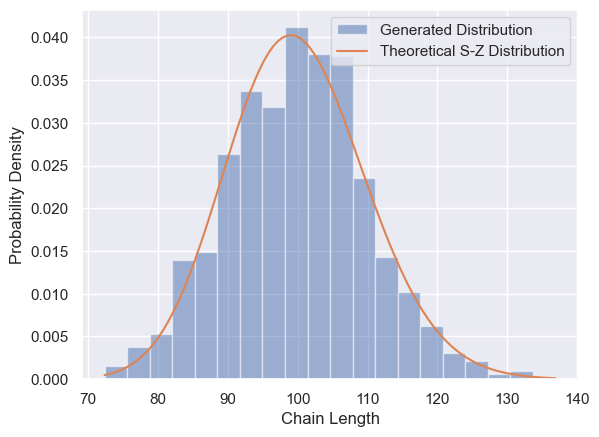

In [106]:
from scipy.stats import gamma

plt.hist(r, bins=20, density=True, alpha=0.5, label="Generated Distribution")
# X-Axis is the logarithim of the size
# plt.xscale('log')

# Plot histogram
# Plot theoretical Schulz-Zimm distribution
x = np.linspace(min(r), max(r), 100)
z = 1 / (PDI - 1)
sz_dist = gamma.pdf(x, a=z+1, scale=Mn/chains/(z+1)) 
plt.plot(x, sz_dist, label="Theoretical S-Z Distribution")

plt.xlabel("Chain Length")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


In [70]:
chain_lengths = [1367, 425, 2047, 1790, 2153, 1091, 1111, 1646, 801, 2347, 958, 2673, 2926, 2507,
 2336, 4275, 2092, 2337, 2544, 1409, 3069, 881, 2388, 1565, 2973, 966, 1380, 2061,
 2807, 1316, 1581, 1794, 2844, 2179, 2755, 2632, 3742, 1905, 875, 2920, 2956, 1563,
 3024, 1968, 1271, 1908, 1145, 1617, 1582, 1473]

print(f"Sum of chain lengths: {sum(chain_lengths)}, difference: {sum(chain_lengths) - Mn}")


Sum of chain lengths: 99975, difference: 99875


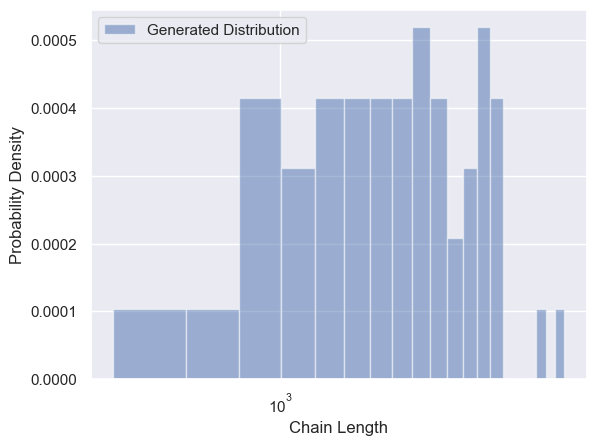

In [63]:

plt.hist(chain_lengths, bins=20, density=True, alpha=0.5, label="Generated Distribution")
plt.xscale('log')
plt.xlabel("Chain Length")
plt.ylabel("Probability Density")
plt.legend()
plt.show()